In [ ]:
#reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import scipy.io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from tabulate import tabulate


**Gender Classification Task**

In [ ]:
data = scipy.io.loadmat("/content/mat1.mat")

In [ ]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'mat1'])


In [ ]:
mat1 = data['mat1']
mat1.shape
print(mat1)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.64759576 0.58282161 0.59156363 ... 0.63992785 0.5918916  0.68946197]
 [0.65320292 0.48277845 0.50255254 ... 0.53624705 0.56293826 0.6442154 ]
 ...
 [0.55553919 0.5152623  0.53676241 ... 0.74185251 0.77300974 0.80166463]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]]


In [ ]:
df = pd.DataFrame(mat1)
print(df)

           0         1         2         3         4         5         6     \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.647596  0.582822  0.591564  0.673888  0.619756  0.713181  0.525265   
2      0.653203  0.482778  0.502553  0.622255  0.553085  0.645016  0.545595   
3      0.584432  0.468668  0.598917  0.628371  0.660292  0.599560  0.567243   
4      0.734723  0.537419  0.620956  0.601271  0.631406  0.674011  0.532116   
...         ...       ...       ...       ...       ...       ...       ...   
21900  0.526669  0.569382  0.663823  0.616654  0.651695  0.589986  0.529408   
21901  0.680545  0.544748  0.713582  0.651248  0.632126  0.592887  0.600300   
21902  0.555539  0.515262  0.536762  0.532665  0.647971  0.612871  0.540879   
21903  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21904  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           7         8         9     ...      1261 

In [ ]:
X = df.iloc[:-1]
y = df.iloc[-1]
X = X.T
print(X.shape)
print(y.shape)
print(X)
print(y)

(1271, 21904)
(1271,)
      0         1         2         3         4         5         6      \
0       0.0  0.647596  0.653203  0.584432  0.734723  0.585615  0.725115   
1       0.0  0.582822  0.482778  0.468668  0.537419  0.447109  0.608017   
2       0.0  0.591564  0.502553  0.598917  0.620956  0.545615  0.623592   
3       0.0  0.673888  0.622255  0.628371  0.601271  0.616827  0.668395   
4       0.0  0.619756  0.553085  0.660292  0.631406  0.566547  0.649662   
...     ...       ...       ...       ...       ...       ...       ...   
1266    0.0  0.687349  0.611063  0.700171  0.834424  0.776355  0.826785   
1267    0.0  0.668779  0.508984  0.697562  0.852635  0.831248  0.803930   
1268    0.0  0.639928  0.536247  0.601695  0.846750  0.812299  0.837336   
1269    0.0  0.591892  0.562938  0.597055  0.826789  0.794421  0.804714   
1270    0.0  0.689462  0.644215  0.652694  0.863307  0.782662  0.843672   

         7         8         9      ...     21894     21895     21896  \
0   

In [ ]:
k = 7
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
print("Selected features indices:", selected_indices)

Selected features indices: [ 1173 10061 19371 19518 20281 20283 21527]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    0   149   298   447   596   745   894  1043  1192  1341  1490  1639
  1788  1937  2086  2235  2384  2533  2682  2831  2980  3129  3278  3427
  3576  3725  3874  4023  4172  4321  4470  4619  4768  4917  5066  5215
  5364  5513  5662  5811  5960  6109  6258  6407  6556  6705  6854  7003
  7152  7301  7450  7599  7748  7897  8046  8195  8344  8493  8642  8791
  8940  9089  9238  9387  9536  9685  9834  9983 10132 10281 10430 10579
 10728 10877 11026 11175 11324 11473 11622 11771 11920 12069 12218 12367
 12516 12665 12814 12963 13112 13261 13410 13559 13708 13857 14006 14155
 14304 14453 14602 14751 14900 15049 15198 15347 15496 15645 15794 15943
 16092 16241 16390 16539 16688 16837 16986 17135 17284 17433 17582 17731
 17880 18029 18178 18327 18476 18625 18774 18923 19072 19221 19370 19519
 19668 19817 19966 20115 20264 20413 20562 20711 20860 21009 21158 21307
 21456

In [ ]:
# male_indices = np.where(y == 0)
# female_indices = np.where(y == 1)

# print(female_indices)
# print(male_indices)

# scores = selector.scores_

# print("\nmale:")
# for idx in male_indices:
#     print(f"Feature {idx}: Score = {scores[idx]}")

# print("\nfemale:")
# for idx in female_indices:
#     print(f"Feature {idx}: Score = {scores[idx]}")

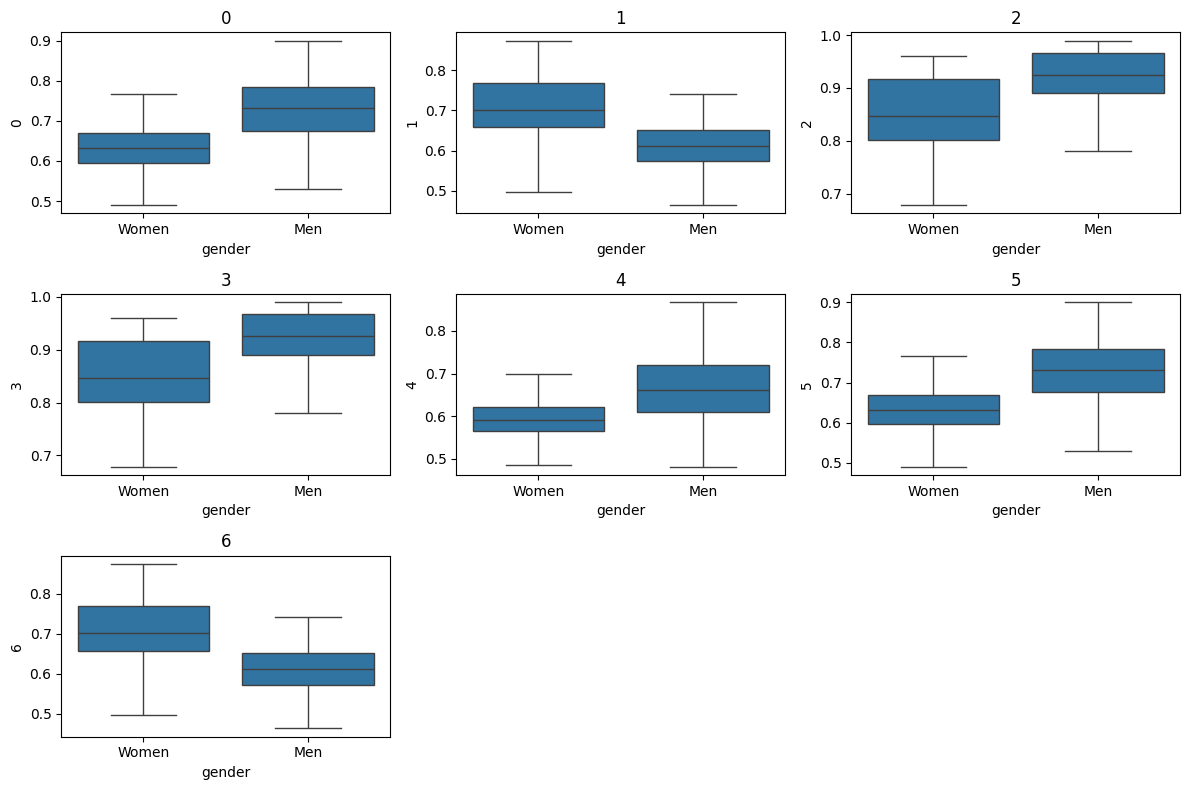

In [ ]:
df = pd.DataFrame(X_selected)
df['gender'] = np.where(y == 0, 'Women', 'Men')

descriptive_stats = df.describe()
descriptive_stats_gender = df.groupby('gender').describe()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='gender', y=feature, data=df, showfliers=False)
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()


In [ ]:
selected_features_table = tabulate(descriptive_stats, headers='keys', tablefmt='fancy_grid', floatfmt=".2f")
gender_table = tabulate(descriptive_stats_gender, headers='keys', tablefmt='fancy_grid', floatfmt=".2f")

print("Descriptive Statistics for Selected Features:")
print(selected_features_table)

print("\nDescriptive Statistics for Selected Features by Gender:")
print(gender_table)

Descriptive Statistics for Selected Features:
╒═══════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│       │       0 │       1 │       2 │       3 │       4 │       5 │       6 │
╞═══════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ count │ 1271.00 │ 1271.00 │ 1271.00 │ 1271.00 │ 1271.00 │ 1271.00 │ 1271.00 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ mean  │    0.69 │    0.66 │    0.89 │    0.89 │    0.64 │    0.69 │    0.66 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ std   │    0.08 │    0.11 │    0.07 │    0.07 │    0.07 │    0.08 │    0.11 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ min   │    0.45 │    0.43 │    0.68 │    0.68 │    0.46 │    0.45 │    0.43 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 25%   │    0.63 │    0.60 │    0.84 │    0.84 │    0.58 │    0.63 │    0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print(y_train.shape)
print(X_train.shape)

(1016,)
(1016, 7)


In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print("SVM Metrics:")
print("SVM Accuracy:", svm_accuracy)

print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

SVM Metrics:
SVM Accuracy: 0.8549019607843137
Precision: 0.8581081081081081
Recall: 0.8881118881118881
F1-score: 0.872852233676976


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
print("KNN Metrics:")
print("KNN Accuracy:", knn_accuracy)

print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)

KNN Metrics:
KNN Accuracy: 0.8901960784313725
Precision: 0.9197080291970803
Recall: 0.8811188811188811
F1-score: 0.8999999999999999


Confusion Matrix for SVM:
[[ 91  21]
 [ 16 127]]

Confusion Matrix for k-NN:
[[101  11]
 [ 17 126]]


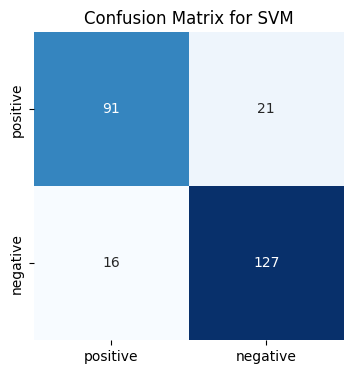

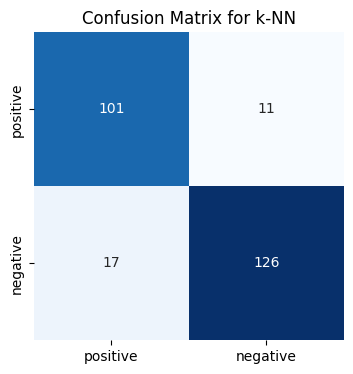

In [ ]:
svm_cm = confusion_matrix(y_test, svm_pred)

knn_cm = confusion_matrix(y_test, knn_pred)

print("Confusion Matrix for SVM:")
print(svm_cm)

print("\nConfusion Matrix for k-NN:")
print(knn_cm)

svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['positive', 'negative'],
            yticklabels=['positive', 'negative'])
plt.title('Confusion Matrix for SVM')
plt.show()

knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['positive', 'negative'],
            yticklabels=['positive', 'negative'])
plt.title('Confusion Matrix for k-NN')
plt.show()


In [ ]:
# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

svm_cv_scores = cross_val_score(svm, X_selected, y, cv=kf, scoring='accuracy')
svm_cv_accuracy = svm_cv_scores.mean()

knn_cv_scores = cross_val_score(knn, X_selected, y, cv=kf, scoring='accuracy')
knn_cv_accuracy = knn_cv_scores.mean()

svm_cv_precision = cross_val_score(svm, X_selected, y, cv=kf, scoring='precision').mean()
svm_cv_recall = cross_val_score(svm, X_selected, y, cv=kf, scoring='recall').mean()
svm_cv_f1 = cross_val_score(svm, X_selected, y, cv=kf, scoring='f1').mean()


knn_cv_precision = cross_val_score(knn, X_selected, y, cv=kf, scoring='precision').mean()
knn_cv_recall = cross_val_score(knn, X_selected, y, cv=kf, scoring='recall').mean()
knn_cv_f1 = cross_val_score(knn, X_selected, y, cv=kf, scoring='f1').mean()


In [ ]:
#cross valiation SVM metrics
print("Cross validation SVM Metrics:")
print("Average Accuracy:", svm_cv_accuracy)
print("Average Precision:", svm_cv_precision)
print("Average Recall:", svm_cv_recall)
print("Average F1-score:", svm_cv_f1)

#cross valiation KNN metrics
print("\nCross validation KNN metrics:")
print("Average Accuracy:", knn_cv_accuracy)
print("Average Precision:", knn_cv_precision)
print("Average Recall:", knn_cv_recall)
print("Average F1-score:", knn_cv_f1)

Cross validation SVM Metrics:
Average Accuracy: 0.8662559827080438
Average Precision: 0.8856586036367936
Average Recall: 0.8852623514100195
Average F1-score: 0.885116118178322

Cross validation KNN metrics:
Average Accuracy: 0.8977242550563533
Average Precision: 0.9471946869781356
Average Recall: 0.8729522456237969
Average F1-score: 0.9082365056709854


In [ ]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

svm_grid_search = GridSearchCV(SVC(kernel='linear'), svm_param_grid, cv=5)
svm_grid_search.fit(X_selected, y)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_selected)

svm_pca = SVC(kernel='linear')
svm_pca.fit(X_pca, y)

knn_param_grid = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid_search.fit(X_selected, y)

knn_pca = KNeighborsClassifier(n_neighbors=10)
knn_pca.fit(X_pca, y)

print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best score for SVM:", svm_grid_search.best_score_)
print("Best parameters for KNN:", knn_grid_search.best_params_)
print("Best score for KNN:", knn_grid_search.best_score_)

Best parameters for SVM: {'C': 1, 'gamma': 0.1}
Best score for SVM: 0.8465616797900264
Best parameters for KNN: {'n_neighbors': 15, 'weights': 'uniform'}
Best score for KNN: 0.8418280067932684


**Age Classification Task**

In [ ]:
data = scipy.io.loadmat('/content/all_epochs_final_LABELED.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'all_epochs_final'])


In [ ]:
mat2 = data['all_epochs_final']
mat2.shape
print(mat2)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.62155139 0.58156328 0.59160199 ... 0.99961292 0.9994126  0.99960555]
 [0.60890351 0.58123721 0.49519495 ... 0.99919784 0.9978543  0.99891085]
 ...
 [0.6213349  0.48649898 0.5366608  ... 0.99995561 0.99992085 0.99993894]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.         0.         0.        ]]


In [ ]:
df2 = pd.DataFrame(mat2)
print(df2)

           0         1         2         3         4         5         6     \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.621551  0.581563  0.591602  0.572611  0.555390  0.561822  0.536170   
2      0.608904  0.581237  0.495195  0.588287  0.563952  0.664627  0.587096   
3      0.578605  0.587691  0.554662  0.586430  0.564059  0.603013  0.531835   
4      0.664136  0.556493  0.567646  0.618221  0.574682  0.536251  0.563179   
...         ...       ...       ...       ...       ...       ...       ...   
21900  0.555295  0.589682  0.445077  0.532185  0.498339  0.575389  0.492054   
21901  0.691535  0.467148  0.641506  0.522452  0.624896  0.608217  0.559438   
21902  0.621335  0.486499  0.536661  0.558999  0.570838  0.574401  0.565443   
21903  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21904  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

           7         8         9     ...      1343 

In [ ]:
X = df2.iloc[:-1]
y = df2.iloc[-1]
X = X.T
print(X.shape)
print(y.shape)
print(X)
print(y)

(1353, 21904)
(1353,)
      0         1         2         3         4         5         6      \
0       0.0  0.621551  0.608904  0.578605  0.664136  0.701775  0.568980   
1       0.0  0.581563  0.581237  0.587691  0.556493  0.669873  0.573834   
2       0.0  0.591602  0.495195  0.554662  0.567646  0.691985  0.662553   
3       0.0  0.572611  0.588287  0.586430  0.618221  0.686700  0.627380   
4       0.0  0.555390  0.563952  0.564059  0.574682  0.644546  0.611373   
...     ...       ...       ...       ...       ...       ...       ...   
1348    0.0  0.999716  0.998845  0.999710  0.999751  0.999669  0.999760   
1349    0.0  0.999442  0.998153  0.999637  0.999587  0.999530  0.999498   
1350    0.0  0.999613  0.999198  0.999601  0.999676  0.999562  0.999691   
1351    0.0  0.999413  0.997854  0.999624  0.999516  0.999502  0.999464   
1352    0.0  0.999606  0.998911  0.999558  0.999663  0.999623  0.999680   

         7         8         9      ...     21894     21895     21896  \
0   

In [ ]:
k = 9
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
print("Selected features indices:", selected_indices)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    0   149   298   447   596   745   894  1043  1192  1341  1490  1639
  1788  1937  2086  2235  2384  2533  2682  2831  2980  3129  3278  3427
  3576  3725  3874  4023  4172  4321  4470  4619  4768  4917  5066  5215
  5364  5513  5662  5811  5960  6109  6258  6407  6556  6705  6854  7003
  7152  7301  7450  7599  7748  7897  8046  8195  8344  8493  8642  8791
  8940  9089  9238  9387  9536  9685  9834  9983 10132 10281 10430 10579
 10728 10877 11026 11175 11324 11473 11622 11771 11920 12069 12218 12367
 12516 12665 12814 12963 13112 13261 13410 13559 13708 13857 14006 14155
 14304 14453 14602 14751 14900 15049 15198 15347 15496 15645 15794 15943
 16092 16241 16390 16539 16688 16837 16986 17135 17284 17433 17582 17731
 17880 18029 18178 18327 18476 18625 18774 18923 19072 19221 19370 19519
 19668 19817 19966 20115 20264 20413 20562 20711 20860 21009 21158 21307
 21456

Selected features indices: [ 4236  6934 12558 13644 18182 18694 18732 18770 18857]


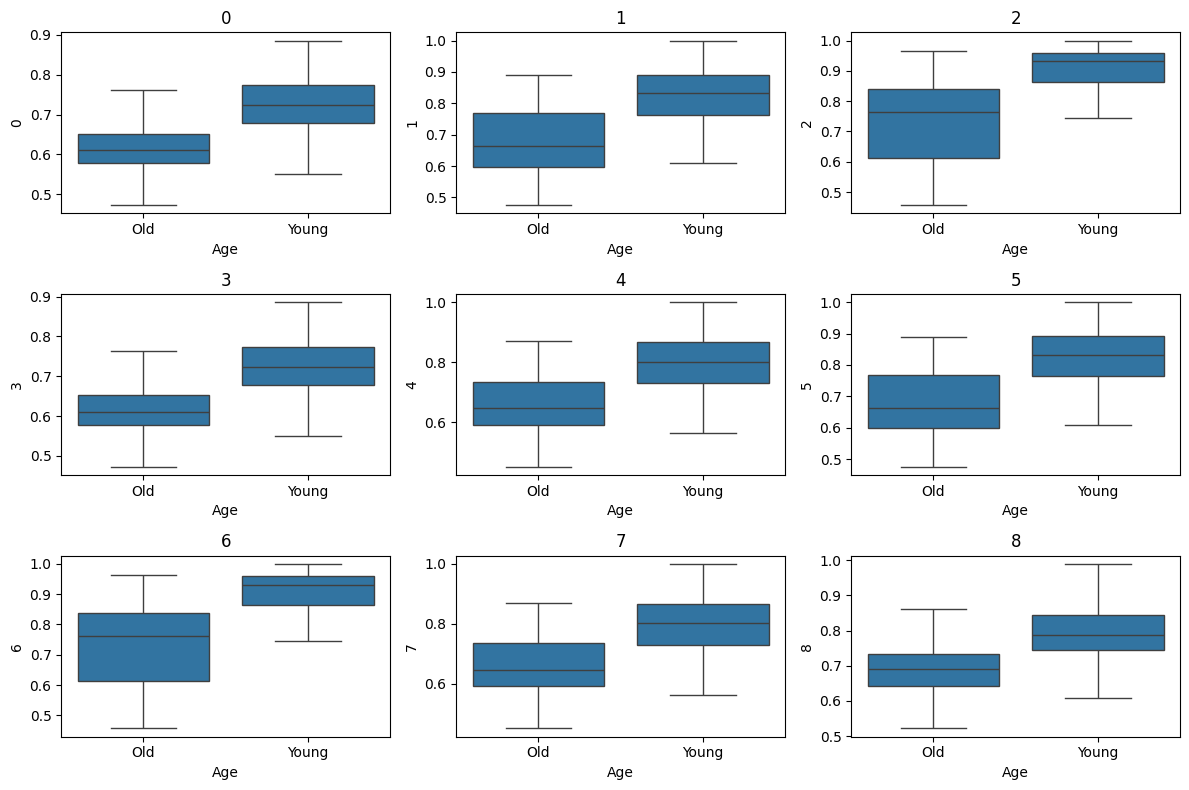

In [ ]:
df2 = pd.DataFrame(X_selected)
df2['Age'] = np.where(y == 0, 'Young', 'Old')

descriptive_stats2 = df2.describe()
descriptive_stats_age = df2.groupby('Age').describe()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(df2.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Age', y=feature, data=df2, showfliers=False)
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()


In [ ]:
selected_features_table = tabulate(descriptive_stats, headers='keys', tablefmt='fancy_grid', floatfmt=".2f")
age_group_table = tabulate(descriptive_stats_age, headers='keys', tablefmt='fancy_grid', floatfmt=".2f")
print("Descriptive Statistics for Selected Features:")
print(selected_features_table)

print("\nDescriptive Statistics for Selected Features by Age Group:")
print(age_group_table)

Descriptive Statistics for Selected Features:
╒═══════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│       │       0 │       1 │       2 │       3 │       4 │       5 │       6 │
╞═══════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ count │ 1271.00 │ 1271.00 │ 1271.00 │ 1271.00 │ 1271.00 │ 1271.00 │ 1271.00 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ mean  │    0.69 │    0.66 │    0.89 │    0.89 │    0.64 │    0.69 │    0.66 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ std   │    0.08 │    0.11 │    0.07 │    0.07 │    0.07 │    0.08 │    0.11 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ min   │    0.45 │    0.43 │    0.68 │    0.68 │    0.46 │    0.45 │    0.43 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 25%   │    0.63 │    0.60 │    0.84 │    0.84 │    0.58 │    0.63 │    0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print(y_train.shape)
print(X_train.shape)

(1082,)
(1082, 9)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
print("KNN Metrics:")
print("KNN Accuracy:", knn_accuracy)

print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)

KNN Metrics:
KNN Accuracy: 0.9188191881918819
Precision: 0.9577464788732394
Recall: 0.8947368421052632
F1-score: 0.9251700680272109


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest Metrics:")
print("Random Forest Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

Random Forest Metrics:
Random Forest Accuracy: 0.9261992619926199
Precision: 0.94
Recall: 0.9276315789473685
F1-score: 0.9337748344370861


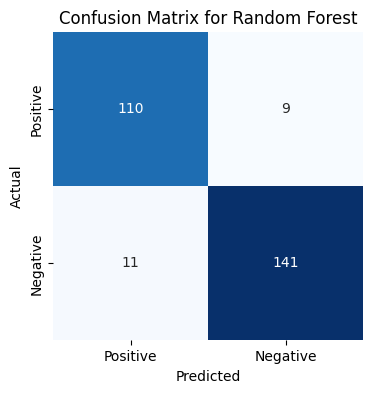

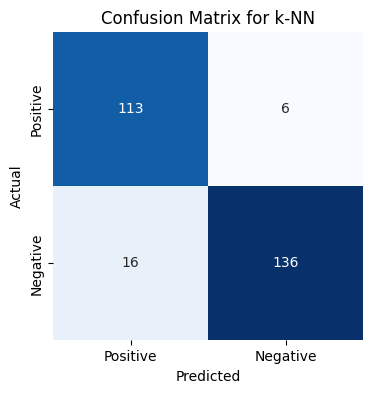

In [ ]:
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix for k-NN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

knn_cv_accuracy = cross_val_score(knn, X_selected, y, cv=5, scoring='accuracy').mean()
knn_cv_precision = cross_val_score(knn, X_selected, y, cv=5, scoring='precision').mean()
knn_cv_recall = cross_val_score(knn, X_selected, y, cv=5, scoring='recall').mean()
knn_cv_f1 = cross_val_score(knn, X_selected, y, cv=5, scoring='f1').mean()

rf_cv_accuracy = cross_val_score(rf, X_selected, y, cv=5, scoring='accuracy').mean()
rf_cv_precision = cross_val_score(rf, X_selected, y, cv=5, scoring='precision').mean()
rf_cv_recall = cross_val_score(rf, X_selected, y, cv=5, scoring='recall').mean()
rf_cv_f1 = cross_val_score(rf, X_selected, y, cv=5, scoring='f1').mean()



In [ ]:
print("5-fold Cross-Validation Metrics:")
print("\nKNN Metrics:")
print("KNN Accuracy:", knn_cv_accuracy)
print("Precision:", knn_cv_precision)
print("Recall:", knn_cv_recall)
print("F1-score:", knn_cv_f1)

print("\nRandom Forest Metrics:")
print("Random Forest Accuracy:", rf_cv_accuracy)
print("Precision:", rf_cv_precision)
print("Recall:", rf_cv_recall)
print("F1-score:", rf_cv_f1)

5-fold Cross-Validation Metrics:

KNN Metrics:
KNN Accuracy: 0.8092442257755911
Precision: 0.8936523567637019
Recall: 0.7523809523809524
F1-score: 0.7919096114755735

Random Forest Metrics:
Random Forest Accuracy: 0.8085144184775181
Precision: 0.8860615999916396
Recall: 0.7659863945578231
F1-score: 0.8013847704895968
